In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def plotGraph(history):
    loss,acc,val_loss,val_acc = history.history.values()
    epochs = range(1,len(loss)+1)
    # Plot graph
    plt.plot(epochs,acc,'r-^',label = 'Training Accuracy')
    plt.plot(epochs,val_acc,'b-*', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs,loss,'r-^',label='Training Loss')
    plt.plot(epochs,val_loss,'b-*',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

def trainModel(model, num_epochs):
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    plotGraph(model.fit(train_data, epochs=num_epochs, validation_data=test_data))

imdb, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRN49Y4/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRN49Y4/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRN49Y4/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
BUFFER_SIZE = 100
BATCH_SIZE = 80

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 15)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
313/313 [==============================] - 15s 42ms/step - loss: 0.6922 - accuracy: 0.5263 - val_loss: 0.6783 - val_accuracy: 0.6540
Epoch 2/15
313/313 [==============================] - 12s 37ms/step - loss: 0.6543 - accuracy: 0.6906 - 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 145,617
Trainable params: 145,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 419s 1s/step - loss: 0.6353 - accuracy: 0.6012 - val_loss: 0.4299 - val_accuracy: 0.8096
Epoch 2/5
270/313 [========================>.....] - ETA: 47s - loss: 0.3825 - accuracy: 0.8389

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 632,689
Trainable params: 632,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 1481s 5s/step - loss: 0.6186 - accuracy: 0.6494 - val_loss: 0

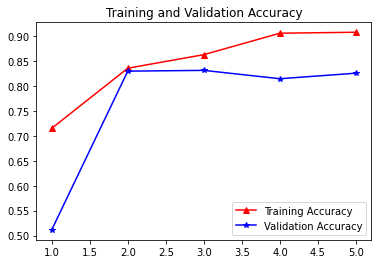

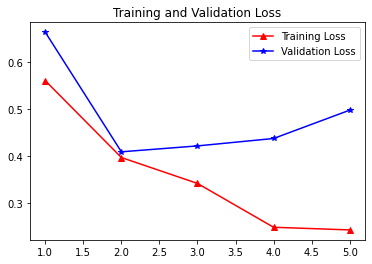

<Figure size 432x288 with 0 Axes>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
trainModel(model, 5)